<h2><center>ASSIGNMENT 2</center></h2>
<h3><center>Mounica Subramani</center></h3>

### Problem 1 [Linear regression]

In [8]:
!pip install statsmodels

     |████████████████████████████████| 10.5MB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 235kB 16.1MB/s eta 0:00:01


In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

from numpy.linalg import inv

from statsmodels.regression.linear_model import OLS

In [2]:
# read in data
KChouse_train = pd.read_csv('train.csv')
KChouse_test = pd.read_csv('test.csv')

# ignore the columns id, date, unnamed column as well as the categorical column zipcode.
KChouse_train = KChouse_train.drop(columns = ['zipcode','Unnamed: 0'])
KChouse_test = KChouse_test.drop(columns = ['id','zipcode','date','Unnamed: 0'])

In [11]:

KChouse_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [7]:
# correlation coefficients of features/variables
KChouse_train.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.704776
grade            0.647349
sqft_living15    0.645106
sqft_above       0.582407
bathrooms        0.487157
view             0.445316
sqft_basement    0.367365
lat              0.365770
waterfront       0.317143
bedrooms         0.307058
floors           0.239935
sqft_lot15       0.161746
sqft_lot         0.146645
yr_renovated     0.146348
condition        0.073961
long             0.032846
yr_built         0.016055
Name: price, dtype: float64

(a) Use an existing package to train a multiple linear regression model on the training set using all the
features (except the ones excluded above). Report the coefficients of the linear regression models and
the MSE metric on the training data

In [8]:
# Linear regression model
X_train = KChouse_train.drop(['price'], axis=1)
y_train = KChouse_train[['price']]

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
# print("X_train.shape:",X_train.shape)

Cross-validation scores: [0.67837004 0.70416297 0.6125577  0.72692348 0.55953864 0.79355793
 0.71355718 0.7597062  0.67484746 0.72691946]
Average cross-validation score: 0.70


In [9]:
model_fitted = model.fit(X_train, y_train)

In [10]:
predictions = model_fitted.predict(X_train)
# predictions

In [11]:
print("Mean squared error for train data:",mean_squared_error(y_train,predictions))

Mean squared error for train data: 31486167775.794903


(b) Perform feature standardization so that each feature (including the response) has mean 0 and variance
of 1. Train again a linear regression model on the training data and report the MSE on the training
data.

#### Scaling data so that each feature has mean 0 and standard deviation 1.

In [12]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(KChouse_train)
data_scaled_test = scaler.fit_transform(KChouse_test)

In [13]:
data_scaled

array([[-0.87974769, -0.40982347, -1.44988843, ..., -0.35519332,
        -0.96563661, -0.3128578 ],
       [ 0.05182493, -0.40982347,  0.28318404, ..., -0.7998304 ,
        -0.44332966, -0.23355563],
       [-1.00323042, -1.58410276, -1.44988843, ..., -0.18307573,
         1.09374507, -0.21669046],
       ...,
       [ 0.0975047 , -1.58410276, -1.44988843, ..., -0.86437449,
        -1.02532883, -0.4185143 ],
       [-0.97390696, -1.58410276, -1.44988843, ...,  1.07911986,
        -0.80148299, -0.40352304],
       [-0.68199849, -0.40982347, -0.06343045, ..., -0.46993837,
         0.39236146, -0.15736334]])

In [14]:
df = pd.DataFrame(data=data_scaled[:,0:],
                  index=data_scaled[:,0],
                  columns=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'])

In [15]:
df = df.reset_index(drop=True)
df.shape

(1000, 18)

In [16]:

X_train_scaled = df.drop(['price'], axis=1)
y_train_scaled = df[['price']]

model1 = LinearRegression()

scores = cross_val_score(model1, X_train_scaled, y_train_scaled, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.67837004 0.70416297 0.6125577  0.72692348 0.55953864 0.79355793
 0.71355718 0.7597062  0.67484746 0.72691946]
Average cross-validation score: 0.70


In [17]:
model_fitted1 = model1.fit(X_train_scaled, y_train_scaled)

In [18]:
predictions_scaled = model_fitted1.predict(X_train_scaled)
# predictions_scaled

In [19]:
model_fitted1.coef_

array([[-0.03690325,  0.05460245,  0.16724347,  0.03206976,  0.0237055 ,
         0.18785555,  0.14204967,  0.03820676,  0.27181372,  0.14231485,
         0.07997506, -0.19934981,  0.05090017,  0.23097972, -0.00305083,
         0.13432109, -0.03810604]])

In [20]:
print("Mean squared error for scaled train data:",mean_squared_error(y_train_scaled,predictions_scaled))

Mean squared error for scaled train data: 0.2734665681293983


(c) Evaluate both models on the testing set. Report the MSE on the testing set

##### Linear regression model on unscaled test data

In [21]:
X_test = KChouse_test.drop(['price'], axis=1)
y_test = KChouse_test[['price']]

model2 = LinearRegression()

scores = cross_val_score(model2, X_test, y_test, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.572243   0.7302379  0.4195207  0.69421544 0.58056117 0.64406129
 0.58310599 0.67480098 0.69470867 0.5749148 ]
Average cross-validation score: 0.62


In [22]:
model_fitted2 = model2.fit(X_test, y_test)

In [23]:
predictions2 = model_fitted2.predict(X_test)
# predictions

In [24]:
model_fitted2.coef_

array([[-5.09706680e+04,  4.53522145e+04,  1.29557364e+02,
         4.60107448e-01, -4.08290867e+03,  6.67916885e+05,
         6.41825495e+04,  3.74395531e+04,  8.69134817e+04,
         7.58952045e+01,  5.36621580e+01, -2.59297980e+03,
        -5.13466279e+00,  5.67370348e+05, -7.67745545e+04,
         3.41095820e+01, -8.48109171e-01]])

In [25]:
print("Mean squared error for non scaled test data:",mean_squared_error(y_test,predictions2))

Mean squared error for non scaled test data: 54185036855.79512


##### Linear regression on scaled test data

In [26]:
df_scaled = pd.DataFrame(data=data_scaled_test[1:,0:],
                  index=data_scaled_test[1:,0],
                  columns=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'])

df_scaled = df_scaled.reset_index(drop=True)

In [27]:
X_test_scaled = df_scaled.drop(['price'], axis=1)
y_test_scaled = df_scaled[['price']]

model3 = LinearRegression()

scores = cross_val_score(model3, X_test_scaled, y_test_scaled, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.61750399 0.72177335 0.41520807 0.69590594 0.58111104 0.63899562
 0.58430498 0.67685041 0.6919166  0.57445912]
Average cross-validation score: 0.62


In [28]:
model_fitted3 = model3.fit(X_test_scaled, y_test_scaled)

In [29]:
predictions_scaled1 = model_fitted3.predict(X_test_scaled)
# predictions_scaled1

In [30]:
model_fitted3.coef_

array([[-0.11656073,  0.08800974,  0.23817802,  0.0661224 , -0.00525078,
         0.1852539 ,  0.12709521,  0.06128675,  0.25616884,  0.21405969,
         0.08813423, -0.17705287, -0.00531226,  0.19009029, -0.02545619,
         0.05815344, -0.0584464 ]])

In [31]:
print("Mean squared errorfor scaled test data:",mean_squared_error(y_test_scaled,predictions_scaled1))

Mean squared errorfor scaled test data: 0.3253062062957616


(d) Interpret the results in your own words. Which features contribute mostly to the linear regression
model? Is the model fitting the data well? How large is the model error?

### Problem 2 [Closed-form solution for linear regression]

(a) Implement simple linear regression using the closed form and train a model for one feature (sqft living)
using the training set. Write code to predict a response for a new single-dimensional data point in the
testing set.

#### Simple linear regression with one feature(sqft living)

In [32]:
# obtain the feature matrix 
KChouse_train1 = df.drop(columns = ['price'])
KChouse_test1 = df_scaled.drop(columns = ['price'])

X = KChouse_train1[['sqft_living15']]
X['ones'] = 1
X_test = KChouse_test1[['sqft_living15']]
X_test['ones'] = 1

# obtain the target variable 
y = df[['price']]
y_test = df_scaled[['price']]

# calculate coefficients using closed-form solution
coeffs_CF = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

y_prediction = X.dot(coeffs_CF)
y_test_prediction = X_test.dot(coeffs_CF)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# extract the feature names into list

feature_names = list(X.columns)
feature_names

# convert list to array

features = np.asarray(feature_names)
features

# convert both the array vectors into dataframe
res = pd.DataFrame(coeffs_CF)

res1 = pd.DataFrame(features)

# merge dataframes
results = pd.merge(res1, res, left_index=True, right_index=True)
results = results.rename(columns={'0_x':'Features','0_y':'coeffs_CF'})

results

,Features,coeffs_CF
0,sqft_living15,6.451060e-01
1,ones,1.101549e-16


In [34]:
y_prediction.head()

,0
0,-0.622938
1,-0.285995
2,0.705582
3,-0.603684
4,-0.180098


In [35]:
y_test_prediction.head()

,0
0,-0.355080
1,-0.141438
2,-0.057839
3,-0.292845
4,-0.596589


In [36]:
print("Mean squared error for training data:",mean_squared_error(y,y_prediction))
print("Mean squared error for testing data:",mean_squared_error(y_test,y_test_prediction))

Mean squared error for training data: 0.5838382382385959
Mean squared error for testing data: 0.6764263056279269


(b) Implement the closed-from solution for multiple linear regression using matrix operations and train a
model on the training set. Write code to predict a response for a new multi-dimensional data point in
the testing set.

#### Multiple linear regression with all features

In [37]:
X1 = KChouse_train1
X1['ones'] = 1

X_test1 = KChouse_test1
X_test1['ones'] = 1

# obtain the target variable 
y1 = df[['price']]
y_test1 = df_scaled[['price']]

# calculate coefficients using closed-form solution
coeffs_CF_1 = inv(X1.transpose().dot(X1)).dot(X1.transpose()).dot(y1)

y_prediction1 = X1.dot(coeffs_CF_1)
y_test_prediction1 = X_test1.dot(coeffs_CF_1)


In [38]:
# extract the feature names into list

feature_names1 = list(X1.columns)
# print(feature_names1)

# convert list to array

features1 = np.asarray(feature_names1)
# print(features1)

# convert both the array vectors into dataframe
res2 = pd.DataFrame(coeffs_CF_1)

res3 = pd.DataFrame(features1)

# merge dataframes
results1 = pd.merge(res2, res3, left_index=True, right_index=True)
results1 = results1.rename(columns={'0_x':'Features','0_y':'coeffs_CF'})

results1

,Features,coeffs_CF
0,1.049397e-01,bedrooms
1,-7.231022e-02,bathrooms
2,1.611738e-01,sqft_living
3,3.723455e-02,sqft_lot
4,7.838885e-02,floors
5,1.872837e-01,waterfront
6,1.318097e-01,view
7,4.236297e-02,condition
8,2.727301e-01,grade
9,2.973037e-02,sqft_above


In [39]:
y_prediction1.head()

,0
0,-0.530996
1,0.502050
2,-0.175832
3,-0.351732
4,-0.252701


In [40]:
y_test_prediction1.head()

,0
0,-0.758054
1,-0.780662
2,-0.064582
3,-1.145454
4,0.080467


In [41]:
print("Mean squared error for training data:",mean_squared_error(y1,y_prediction1))
print("Mean squared error for testing data:",mean_squared_error(y_test1,y_test_prediction1))

Mean squared error for training data: 0.3072940697039435
Mean squared error for testing data: 0.39029935002992094


(c) Compare the models given by your implementation with those trained in Problem 1 by the R or Python
packages. Report the MSE metrics for the models you implemented on both training and testing sets

### Problem 3 [Gradient descent]

(a) Write code for gradient descent for training linear regression using the algorithm from class

In [246]:
X_train = df.iloc[:,1:]
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
print(X_train.shape)
y_train = df.iloc[:,0:1].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
print(y_train.shape)
# theta = np.random.randn(18)
theta = np.zeros([1,18])
print(theta)
#set hyper parameters
alpha = 0.01
iters = 10

(1000, 18)
(1000, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [248]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [252]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
print(g)

finalCost = computeCost(X_train,y_train,g)
print(finalCost)

y_predicted = X_train @ g.T 

rms = sqrt(mean_squared_error(y_train, y_predicted))
print("RMSE:",rms)

[[ 2.76934031e-17  2.32304454e-02  3.79855527e-02  5.73832655e-02
   1.07764271e-02  1.82600167e-02  2.84491420e-02  3.85853294e-02
   7.44868928e-03  5.30247027e-02  4.66605377e-02  3.12417271e-02
  -2.91083356e-03  1.34155739e-02  3.34429373e-02  3.00922028e-05
   5.25033621e-02  1.18673593e-02]]
0.318245129184686
RMSE: 0.7978033958121337


(a) Write code for gradient descent for training linear regression using the algorithm from class

(b) Vary the value of the learning rate (3 different values) and report the value of θ after different number
of iterations (10, 50, and 100). Include the MSE metric on the training and testing set for all values of
θ and number of iterations.

In [52]:
alpha = 0.01
iter_ = 50
cols = KChouse_train1.columns
theta = np.random.randn(len(cols))
theta_t = theta.transpose()
theta_df = pd.DataFrame(theta_t)

# theta_j = gradient_descent(X2,y2,theta_df,alpha,iter_)
# y_test_pred_gd = X_test2.dot(theta_j)
# print("mean squared error on scaled test data:",mean_squared_error(y_test2,y_test_pred_gd))

In [110]:
theta = np.random.randn(len(cols))

In [111]:
theta_t = theta.transpose()

In [95]:
theta_df = pd.DataFrame(theta_t)

In [156]:
test_theta = theta_df[:]

In [50]:
theta_df

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [160]:
test_theta

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [116]:
type(test_theta)

pandas.core.frame.DataFrame

In [139]:
alpha = 0.01
iter = [10,50,100]
cols = KChouse_train1.columns
theta = np.random.randn(len(cols))
theta_t = theta.transpose()
theta_df = pd.DataFrame(theta_t)
for i in iter:
    theta_j = gradient_descent(X2,y2,theta_df,alpha,i)
    y_test_pred_gd = X_test2.dot(theta_j)
    print("mean squared error on scaled test data:",mean_squared_error(y_test2,y_test_pred_gd))

y 1000
i value 0
stop at 0
0    -1.344874
1     0.078297
2    -1.296441
3    -0.008475
4     1.495867
5    -0.305224
6    -1.660201
7     0.658226
8     0.616762
9     0.964803
10    0.363397
11    0.795314
12   -0.216131
13    1.528445
14   -0.069257
15   -1.089687
16    0.742103
17   -2.019432
Name: 0, dtype: float64
stop at 1


KeyError: 1

### Problem 4

(a) Write the derivation of the closed form solution for parameter θ that minimizes the loss function J(θ)
in ridge regression.

(b) Modify your linear regression implementation from Problem 2 to handle ridge regression. Take several values of the regularization parameter λ and output the MSE metric. Plot the value of MSE as a
function of λ. What is the best value of λ that you found? Compare the results of linear regression
and ridge regression on the dataset.

In [58]:
I = np.identity(18)
lamda = []
MSE = []

# derivation of the closed form solution for parameter θ that minimizes the loss function J(θ) in ridge regression

for lamda_i in range(10,10000,20):
    lamda.append(lamda_i)
    coeffs_CF_2 = inv(X1.transpose().dot(X1) + lamda_i * I).dot(X1.transpose()).dot(y1)   
    # Y prediction values for training data
    y_prediction1_rg = X1.dot(coeffs_CF_2)
    # y predictiom values for testing data
    y_test_prediction1_rg = X_test1.dot(coeffs_CF_2)
    
    mean_error = mean_squared_error(y1,y_prediction1_rg)
    mean_error_test = mean_squared_error(y_test1,y_test_prediction1_rg)
    
    # print("Mean squared error for training data:",mean_squared_error(y1,y_prediction1_rg))    
    print("Mean squared error for testing data:",mean_squared_error(y_test1,y_test_prediction1_rg))
    MSE.append(mean_error_test)

Mean squared error for testing data: 0.34025303553729547
Mean squared error for testing data: 0.34023723126129624
Mean squared error for testing data: 0.3403516918776955
Mean squared error for testing data: 0.3405714275669636
Mean squared error for testing data: 0.3408797043308575
Mean squared error for testing data: 0.34126459129498443
Mean squared error for testing data: 0.3417171084114855
Mean squared error for testing data: 0.3422301826072409
Mean squared error for testing data: 0.3427980332650299
Mean squared error for testing data: 0.3434157956831026
Mean squared error for testing data: 0.3440792815076133
Mean squared error for testing data: 0.34478482072381833
Mean squared error for testing data: 0.34552915375463517
Mean squared error for testing data: 0.3463093552647599
Mean squared error for testing data: 0.3471227786014029
Mean squared error for testing data: 0.3479670140404969
Mean squared error for testing data: 0.3488398565194821
Mean squared error for testing data: 0.3497

Mean squared error for testing data: 0.5067099610041128
Mean squared error for testing data: 0.5076166378663693
Mean squared error for testing data: 0.508520298607216
Mean squared error for testing data: 0.5094209538858472
Mean squared error for testing data: 0.5103186144098444
Mean squared error for testing data: 0.5112132909314997
Mean squared error for testing data: 0.5121049942442745
Mean squared error for testing data: 0.5129937351793918
Mean squared error for testing data: 0.5138795246025568
Mean squared error for testing data: 0.5147623734107983
Mean squared error for testing data: 0.5156422925294302
Mean squared error for testing data: 0.5165192929091267
Mean squared error for testing data: 0.5173933855231062
Mean squared error for testing data: 0.5182645813644229
Mean squared error for testing data: 0.5191328914433578
Mean squared error for testing data: 0.5199983267849115
Mean squared error for testing data: 0.5208608984263879
Mean squared error for testing data: 0.5217206174

Mean squared error for testing data: 0.6209376185336897
Mean squared error for testing data: 0.6214875074193097
Mean squared error for testing data: 0.6220358462517769
Mean squared error for testing data: 0.6225826413115164
Mean squared error for testing data: 0.6231278988477315
Mean squared error for testing data: 0.6236716250785574
Mean squared error for testing data: 0.6242138261912205
Mean squared error for testing data: 0.6247545083421921
Mean squared error for testing data: 0.6252936776573454
Mean squared error for testing data: 0.6258313402321097
Mean squared error for testing data: 0.6263675021316268
Mean squared error for testing data: 0.6269021693909047
Mean squared error for testing data: 0.6274353480149722
Mean squared error for testing data: 0.6279670439790335
Mean squared error for testing data: 0.6284972632286215
Mean squared error for testing data: 0.629026011679751
Mean squared error for testing data: 0.6295532952190718
Mean squared error for testing data: 0.6300791197

Mean squared error for testing data: 0.6897605618221119
Mean squared error for testing data: 0.6901320438860107
Mean squared error for testing data: 0.690502651353286
Mean squared error for testing data: 0.6908723872556729
Mean squared error for testing data: 0.6912412546112598
Mean squared error for testing data: 0.6916092564245627
Mean squared error for testing data: 0.691976395686597
Mean squared error for testing data: 0.6923426753749513
Mean squared error for testing data: 0.6927080984538596
Mean squared error for testing data: 0.6930726678742728
Mean squared error for testing data: 0.6934363865739307
Mean squared error for testing data: 0.6937992574774315
Mean squared error for testing data: 0.694161283496305
Mean squared error for testing data: 0.6945224675290803
Mean squared error for testing data: 0.6948828124613564
Mean squared error for testing data: 0.6952423211658726
Mean squared error for testing data: 0.6956009965025755
Mean squared error for testing data: 0.695958841318

In [61]:
# convert list to array

Lamda = np.asarray(lamda)
MSE_df = np.asarray(MSE)
# print(features1)

# convert both the array vectors into dataframe
res_1 = pd.DataFrame(Lamda)

res_2 = pd.DataFrame(MSE_df)

# merge dataframes
result_df = pd.merge(res_1, res_2, left_index=True, right_index=True)
result_df = result_df.rename(columns={'0_x':'Lamda','0_y':'MSE'})

print(result_df)

     Lamda       MSE
0       10  0.340253
1       30  0.340237
2       50  0.340352
3       70  0.340571
4       90  0.340880
5      110  0.341265
6      130  0.341717
7      150  0.342230
8      170  0.342798
9      190  0.343416
10     210  0.344079
11     230  0.344785
12     250  0.345529
13     270  0.346309
14     290  0.347123
15     310  0.347967
16     330  0.348840
17     350  0.349739
18     370  0.350663
19     390  0.351611
20     410  0.352579
21     430  0.353567
22     450  0.354574
23     470  0.355599
24     490  0.356639
25     510  0.357694
26     530  0.358763
27     550  0.359845
28     570  0.360939
29     590  0.362044
..     ...       ...
470   9410  0.688266
471   9430  0.688641
472   9450  0.689015
473   9470  0.689388
474   9490  0.689761
475   9510  0.690132
476   9530  0.690503
477   9550  0.690872
478   9570  0.691241
479   9590  0.691609
480   9610  0.691976
481   9630  0.692343
482   9650  0.692708
483   9670  0.693073
484   9690  0.693436
485   9710  0

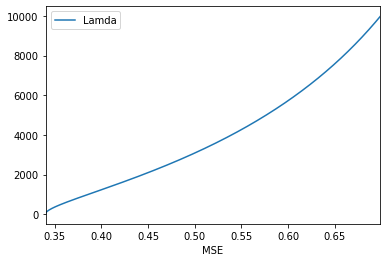

In [63]:
result_df.plot.line(x='MSE', y='Lamda')